In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers[torch]
!pip install datasets
!pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# 데이터 불러오기

In [3]:
DF = pd.read_csv('/content/drive/MyDrive/Final.csv')
DF['product'] = DF['product'].replace('Money transfer, virtual currency, or money service', 'Money transfer')
DF= DF[['consumer complaint narrative','product','issue']]
DF

,consumer complaint narrative,product,issue
0,I made a purchase with XXXX to purchase a prod...,Credit card,Problem with a purchase shown on your statement
1,i asked the JC Penny store employee if there w...,Credit card,Getting a credit card
2,"Synchrony Bank, who owns the stores credit car...",Credit card,Closing your account
3,This bank doesnt value me as a customer or my ...,Credit card,"Other features, terms, or problems"
4,Purchase from XXXX on XX/XX/XXXX XXXX XXXX on ...,Credit card,Problem with a purchase shown on your statement
...,...,...,...
1326536,XX/XX/2022 Truist checking account fraudulentl...,Checking or savings account,Opening an account
1326537,We had 3 savings/investment account that were ...,Checking or savings account,Managing an account
1326538,Please refer all my complaints about Keybank. ...,Checking or savings account,Closing an account
1326539,There is a company name XXXX which provides t...,Checking or savings account,Problem with a lender or other company chargin...


In [4]:
DF_Card = DF[DF['product'] == 'Credit card']
DF_Card

,consumer complaint narrative,product,issue
0,I made a purchase with XXXX to purchase a prod...,Credit card,Problem with a purchase shown on your statement
1,i asked the JC Penny store employee if there w...,Credit card,Getting a credit card
2,"Synchrony Bank, who owns the stores credit car...",Credit card,Closing your account
3,This bank doesnt value me as a customer or my ...,Credit card,"Other features, terms, or problems"
4,Purchase from XXXX on XX/XX/XXXX XXXX XXXX on ...,Credit card,Problem with a purchase shown on your statement
...,...,...,...
95108,XXXX charged me {$95.00} annual fee on XX/XX/X...,Credit card,Fees or interest
95109,This complaint is regarding a fraudulent charg...,Credit card,Problem with a purchase shown on your statement
95110,My personal information was stolen and multipl...,Credit card,Problem with a purchase shown on your statement
95111,"On XX/XX/21 I dined at XXXX XXXX in XXXX, a lo...",Credit card,"Other features, terms, or problems"


# 자연어처리

In [5]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
data = list(DF_Card['consumer complaint narrative'])
clean = []
for narrative in (data):
 clean_narrative = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》XXXX{}]', '', narrative)
 clean.append(clean_narrative)
DF_Card['narrative'] = clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
lower = [text.lower() for text in DF_Card['narrative'].values]
DF_Card['narrative'] = lower

In [7]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

DF_Card["narrative"]=DF_Card["narrative"].apply(lambda x: remove_stopwords(x))

DF_Card.head()

,consumer complaint narrative,product,issue,narrative
0,I made a purchase with XXXX to purchase a prod...,Credit card,Problem with a purchase shown on your statement,made purchase purchase product bestbuy charge ...
1,i asked the JC Penny store employee if there w...,Credit card,Getting a credit card,asked jc penny store employee instore coupons ...
2,"Synchrony Bank, who owns the stores credit car...",Credit card,Closing your account,synchrony bank owns stores credit cards rooms ...
3,This bank doesnt value me as a customer or my ...,Credit card,"Other features, terms, or problems",bank doesnt value customer business never appr...
4,Purchase from XXXX on XX/XX/XXXX XXXX XXXX on ...,Credit card,Problem with a purchase shown on your statement,purchase hacked debit card canceled card next ...


# 데이터 추출 및 컬럼명 변경

In [8]:
DF_test = DF_Card[['narrative','issue']]
DF_test.columns = ['text', 'label']
DF_test

,text,label
0,made purchase purchase product bestbuy charge ...,Problem with a purchase shown on your statement
1,asked jc penny store employee instore coupons ...,Getting a credit card
2,synchrony bank owns stores credit cards rooms ...,Closing your account
3,bank doesnt value customer business never appr...,"Other features, terms, or problems"
4,purchase hacked debit card canceled card next ...,Problem with a purchase shown on your statement
...,...,...
95108,charged 9500 annual fee folowing year switched...,Fees or interest
95109,complaint regarding fraudulent charge citi ban...,Problem with a purchase shown on your statement
95110,personal information stolen multiple cards ope...,Problem with a purchase shown on your statement
95111,21 dined local restaurant number occasions doc...,"Other features, terms, or problems"


# 데이터 분할

In [9]:
x = DF_test
Y = DF_test['label']
x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size = 0.1, stratify = Y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(85601, 2) (85601,) (9512, 2) (9512,)


In [ ]:
x_train.head()

,text,label
123124,cash net usa collector call state accessed ban...,Attempts to collect debt not owed
137006,account kay jewlers years back owed credit car...,Took or threatened to take negative or legal a...
9017,attention credit acceptance corporation submit...,Attempts to collect debt not owed
82704,information given regarding account violates f...,Attempts to collect debt not owed
120350,debt collector called work number explained ab...,Communication tactics


In [ ]:
x_test

,text,label
117121,victim identity theft debt belong please see i...,Attempts to collect debt not owed
64273,southwest recovery service put account credit ...,Written notification about debt
150705,tried dispute debt 230000 allstate credit bure...,Attempts to collect debt not owed
79440,never contract company put debit credit took d...,Attempts to collect debt not owed
145745,understand verified account accurate wrong soc...,Communication tactics
...,...,...
62534,writing bring attention credit file contains c...,Attempts to collect debt not owed
114330,someone stole identity opened many accounts wi...,Attempts to collect debt not owed
57506,seen routine provider used previously supplied...,Attempts to collect debt not owed
101093,representatives discover card keep calling ong...,Communication tactics


# 데이터셋 만들기




In [10]:
import transformers
transformers.logging.set_verbosity_error()
import warnings; warnings.filterwarnings('ignore')
import os; os.environ['WANDB_DISABLED'] = 'true'
from datasets import Dataset,Features,Value,ClassLabel, DatasetDict

traindts = Dataset.from_pandas(x_train)
traindts = traindts.class_encode_column("label")
testdts = Dataset.from_pandas(x_test)
testdts = testdts.class_encode_column("label")

Casting to class labels:   0%|          | 0/85601 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/9512 [00:00<?, ? examples/s]

In [11]:
corpus = DatasetDict({"train" : traindts ,
                      "validation" : testdts })
corpus

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 85601
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 9512
    })
})

# 토큰화

In [12]:
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer

In [13]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [14]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [15]:
tokenized_corpus = corpus.map(preprocess_function, batched=True)

Map:   0%|          | 0/85601 [00:00<?, ? examples/s]

Map:   0%|          | 0/9512 [00:00<?, ? examples/s]

# 패딩?

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding = True,max_length = 128)

# 성능평가 함수

In [16]:
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# 모델

In [ ]:
DF_Card['issue'].value_counts()

issue
Problem with a purchase shown on your statement                    26385
Other features, terms, or problems                                 12497
Fees or interest                                                   10905
Getting a credit card                                              10584
Problem when making payments                                        8747
Problem with a company's investigation into an existing problem     8228
Closing your account                                                7394
Advertising and marketing, including promotional offers             5817
Trouble using your card                                             4556
Name: count, dtype: int64

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = (AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", num_labels=9).to(device))

cuda


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
corpus['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['Attempts to collect debt not owed', 'Communication tactics', 'False statements or representation', 'Took or threatened to take negative or legal action', 'Written notification about debt'], id=None),
 '__index_level_0__': Value(dtype='int64', id=None)}

# 빠인뜌닝

In [ ]:
training_args = TrainingArguments(
    output_dir="best_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_corpus["train"],
    eval_dataset=tokenized_corpus["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

{'loss': 0.7595, 'grad_norm': 9.013144493103027, 'learning_rate': 1.8131190431695013e-05, 'epoch': 0.09344047841524948}
{'loss': 0.6679, 'grad_norm': 13.241026878356934, 'learning_rate': 1.626238086339002e-05, 'epoch': 0.18688095683049896}
{'loss': 0.6498, 'grad_norm': 9.896453857421875, 'learning_rate': 1.4393571295085031e-05, 'epoch': 0.2803214352457485}
{'loss': 0.6171, 'grad_norm': 18.382461547851562, 'learning_rate': 1.2524761726780041e-05, 'epoch': 0.3737619136609979}
{'loss': 0.5848, 'grad_norm': 11.6384859085083, 'learning_rate': 1.0655952158475051e-05, 'epoch': 0.4672023920762474}
{'loss': 0.5465, 'grad_norm': 9.716373443603516, 'learning_rate': 8.787142590170063e-06, 'epoch': 0.560642870491497}
{'loss': 0.5372, 'grad_norm': 19.832380294799805, 'learning_rate': 6.918333021865073e-06, 'epoch': 0.6540833489067464}
{'loss': 0.5397, 'grad_norm': 15.796953201293945, 'learning_rate': 5.049523453560083e-06, 'epoch': 0.7475238273219958}
{'loss': 0.5351, 'grad_norm': 24.48199462890625,

In [ ]:
trainer.save_model()

In [ ]:
# Empty cache
torch.cuda.empty_cache()

# 모델 불러오기

In [17]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments

In [19]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/Credit_Card_model_trans")
loaded_tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/Credit_Card_model_trans")

# TrainingArguments
eval_args = TrainingArguments(
    output_dir="result",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

# Trainer
trainer = Trainer(
    model= model,
    args=eval_args,
    eval_dataset=tokenized_corpus["validation"],
    tokenizer=loaded_tokenizer,
    compute_metrics=compute_metrics,  # 사용자가 정의한 평가 지표 함수
)

eval_result = trainer.evaluate()

{'eval_loss': 0.6252061724662781, 'eval_accuracy': 0.7902649285113541, 'eval_runtime': 201.3301, 'eval_samples_per_second': 47.246, 'eval_steps_per_second': 2.955}


In [ ]:
# 평가 결과 출력
print(eval_result)

In [ ]:
pred_output = trainer.predict(tokenized_corpus["validation"])
pred_output

PredictionOutput(predictions=array([[-0.42168573, -2.1402538 , -1.3028315 , ..., -1.8274453 ,
         2.0445888 ,  0.39404032],
       [ 0.35188532,  0.13751206, -2.3045654 , ..., -0.6835725 ,
         0.63983315, -0.5913678 ],
       [ 1.6077687 ,  0.94681793, -2.1291335 , ..., -0.8592667 ,
        -1.5746284 , -0.507451  ],
       ...,
       [ 1.1549873 , -0.1001073 , -2.155231  , ..., -0.9505138 ,
        -0.08531602, -1.0457252 ],
       [-0.8795117 ,  4.605432  ,  0.73070663, ..., -1.9885769 ,
        -1.3633837 ,  0.49161845],
       [ 5.426022  , -1.2021743 , -0.5597116 , ..., -2.3807888 ,
        -1.3962206 , -0.55528283]], dtype=float32), label_ids=array([7, 3, 3, ..., 4, 1, 0]), metrics={'test_loss': 0.624838650226593, 'test_accuracy': 0.7922624053826746, 'test_runtime': 196.8732, 'test_samples_per_second': 48.315, 'test_steps_per_second': 3.022})

In [ ]:
print(f'Output Predition: {pred_output.predictions.shape}')
print(pred_output.predictions)

Output Predition: (9512, 9)
[[-0.42168573 -2.1402538  -1.3028315  ... -1.8274453   2.0445888
   0.39404032]
 [ 0.35188532  0.13751206 -2.3045654  ... -0.6835725   0.63983315
  -0.5913678 ]
 [ 1.6077687   0.94681793 -2.1291335  ... -0.8592667  -1.5746284
  -0.507451  ]
 ...
 [ 1.1549873  -0.1001073  -2.155231   ... -0.9505138  -0.08531602
  -1.0457252 ]
 [-0.8795117   4.605432    0.73070663 ... -1.9885769  -1.3633837
   0.49161845]
 [ 5.426022   -1.2021743  -0.5597116  ... -2.3807888  -1.3962206
  -0.55528283]]


In [ ]:
import numpy as np

# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(9512,)
Predictions: [4 3 3 ... 3 1 0]


In [ ]:
labels = tokenized_corpus["train"].features["label"].names
labels

['Advertising and marketing, including promotional offers',
 'Closing your account',
 'Fees or interest',
 'Getting a credit card',
 'Other features, terms, or problems',
 'Problem when making payments',
 "Problem with a company's investigation into an existing problem",
 'Problem with a purchase shown on your statement',
 'Trouble using your card']

In [ ]:
y_valid = np.array(tokenized_corpus["validation"]['label'])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(8,8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm.round(2).copy(), display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.tight_layout()
    plt.show()

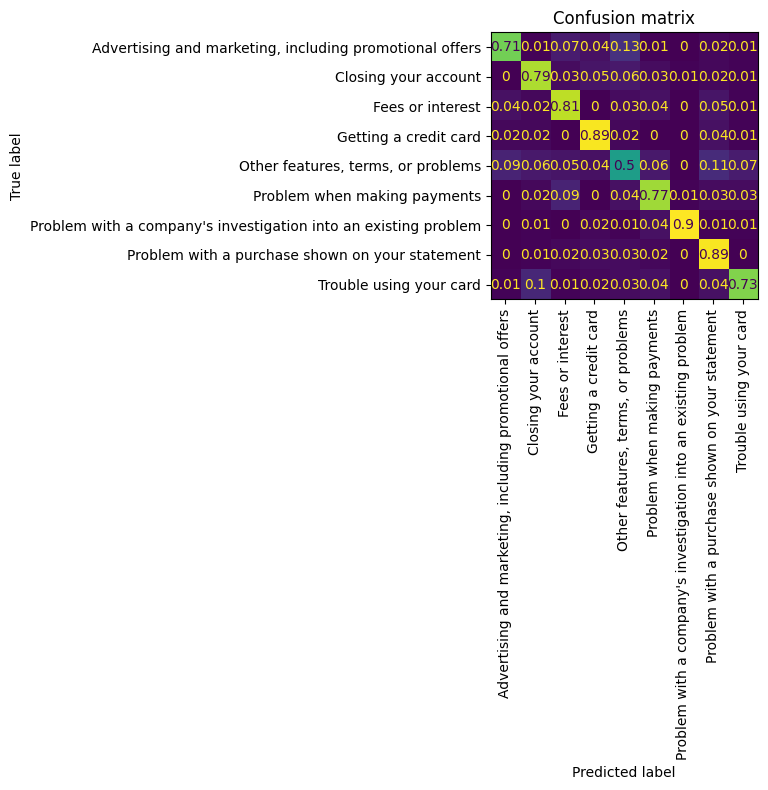

In [ ]:
# Validation
plot_confusion_matrix(y_preds,y_valid,labels)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }